# IMPORTING LIBRARY

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING THE DATASETS

In [4]:
df=pd.read_csv('Data_sets/insurance.csv') 

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# INFORMATION OF DATA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.shape

(1338, 7)

# DESCRIBING SUMMARY OF DATASETS

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.describe(include="object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


# Convert Some columns to Category Columns

In [14]:
df["sex"]=df.sex.astype("category")
df["smoker"]=df.smoker.astype("category")
df["region"]=df.region.astype("category")

# Visualization of Shape

In [16]:
df.shape

(1338, 7)

# Visualization of Columns of The Data

In [18]:
list(df.columns)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

# Handling Missing Values

# Finding Missing Values

In [21]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
print('Okay there is no null values in this datset:')

Okay there is no null values in this datset:


# Listing the Categorical and Numerical Columns

In [24]:
categorical_columns=df.select_dtypes(include=['category','object']).columns
numerical_columns=df.select_dtypes(exclude=['category','object']).columns

# Making Boxplot to Find Outliers

Text(0.5, 1.0, 'Boxplot')

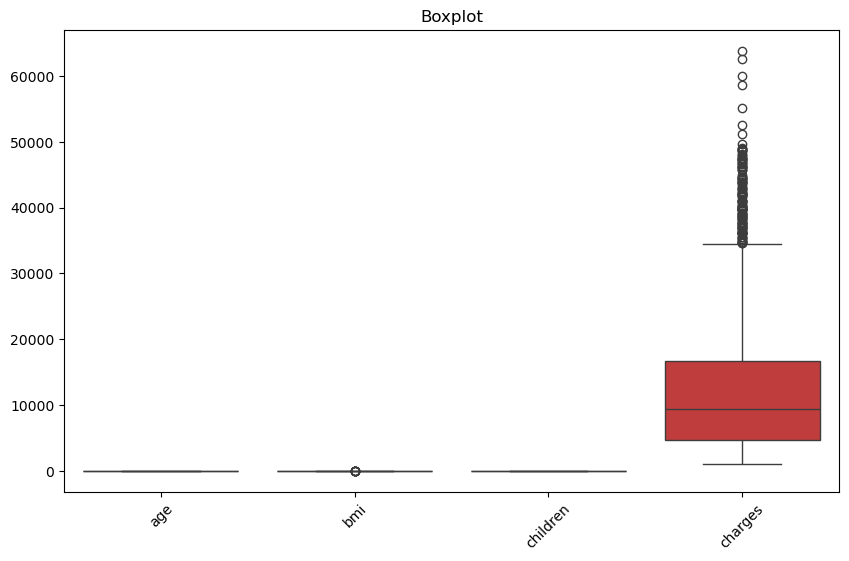

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=45)
plt.title('Boxplot')

In [27]:
import scipy.stats as stats

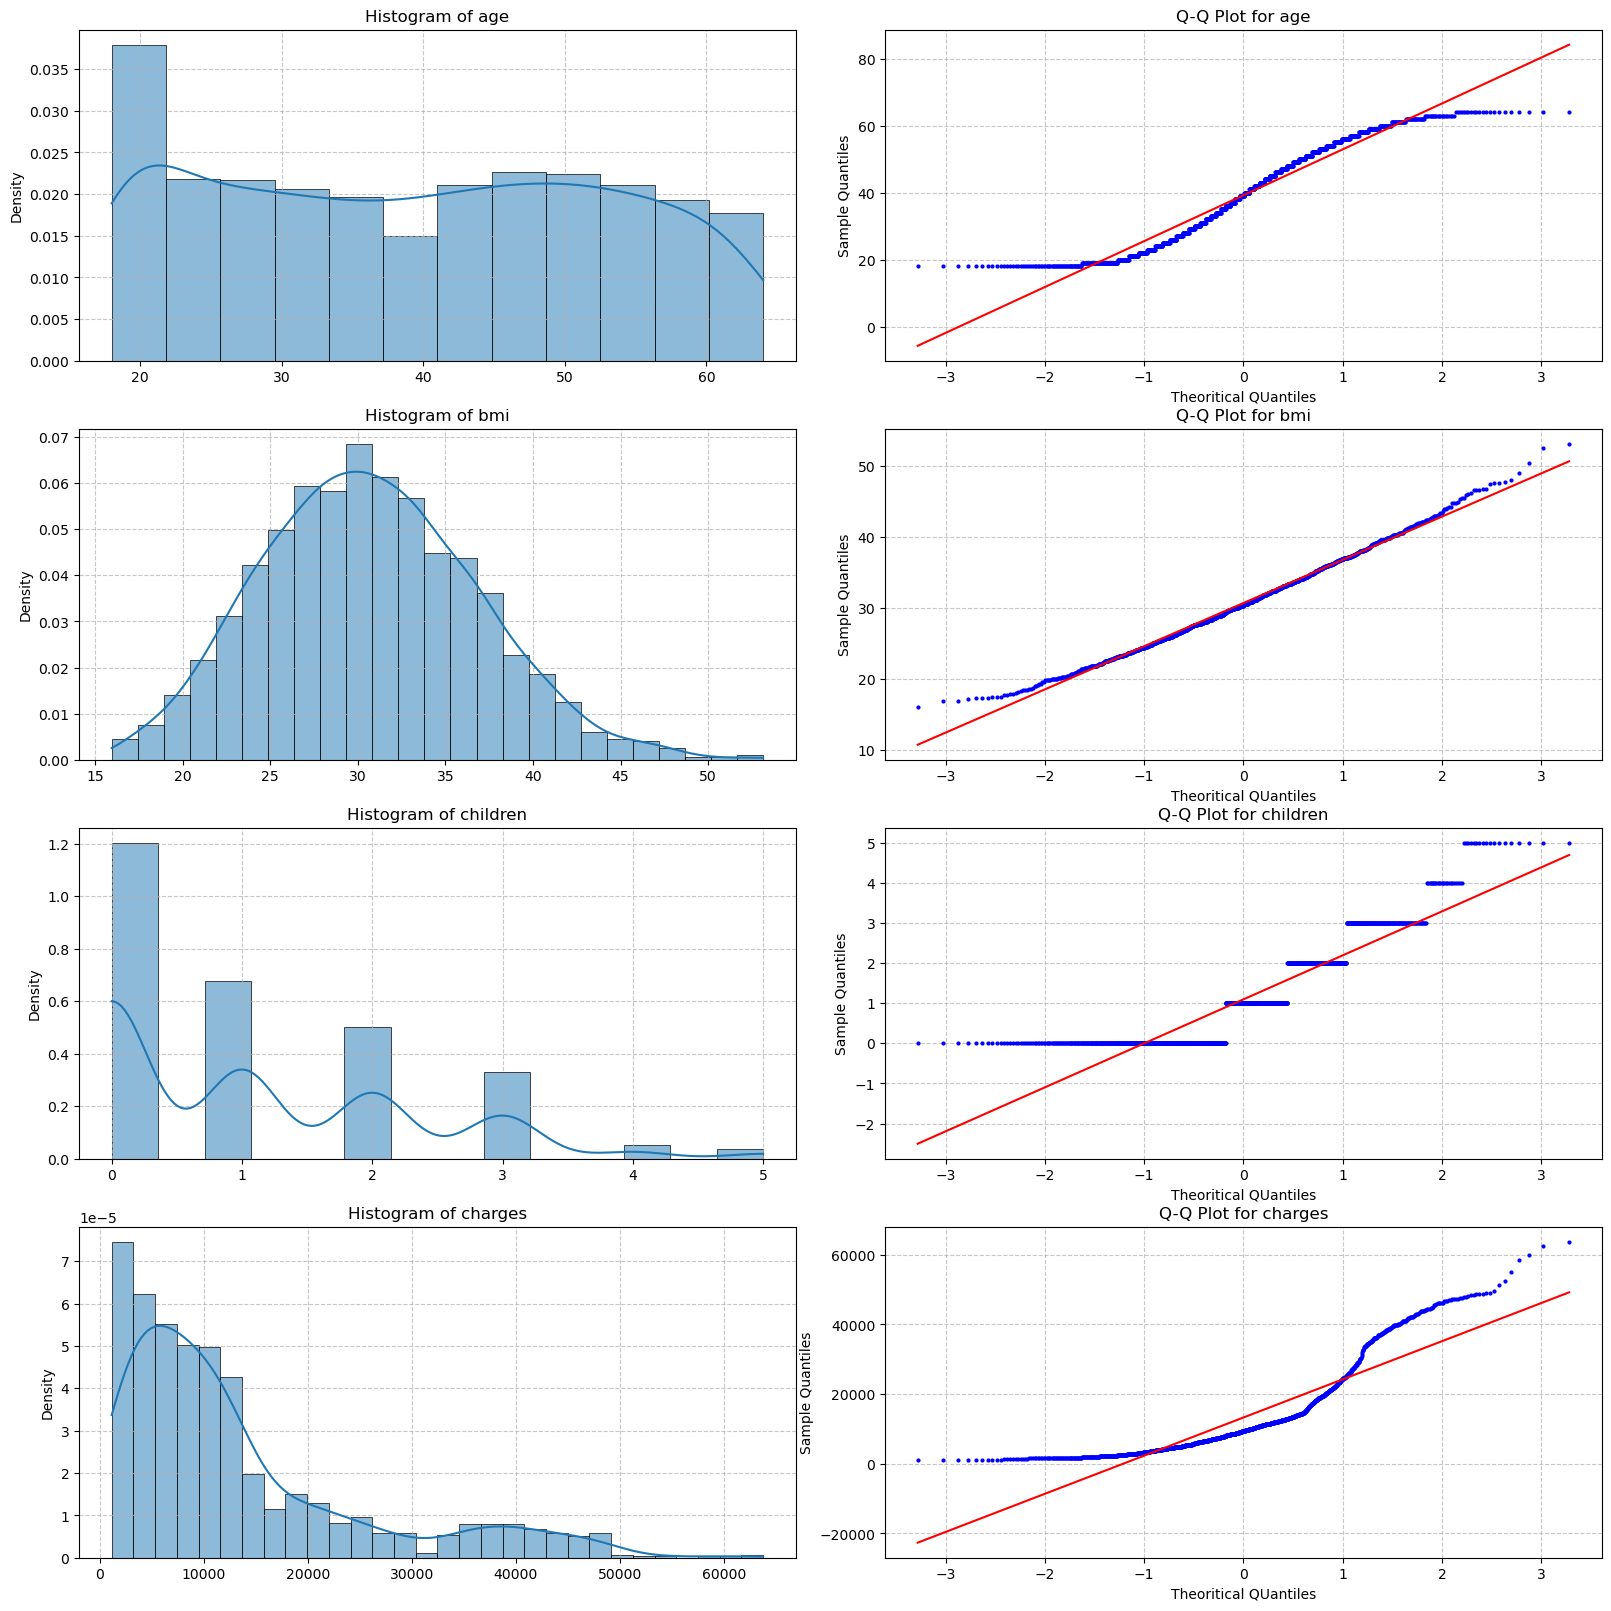

In [28]:
# create a figure and axes for subplots
num_cols= len(numerical_columns)
fig, axes =plt.subplots(num_cols,2,figsize=(16,num_cols *4))

# plotting histograms and Q-Q Plots for each numerical columns
for i, col in enumerate(numerical_columns):
    # Histogram on the left subplot
    sns.histplot(df[col],kde=True,ax=axes[i,0],stat='density',linewidth=0.5)
    axes[i,0].set_title(f'Histogram of {col}')
    axes[i,0].set_xlabel('')
    axes[i,0].set_ylabel('Density')
    axes[i,0].grid(True,linestyle='--',alpha=0.7)

    # Q-Q plot on the right subject
    stats.probplot(df[col],plot=axes[i,1],dist='norm',fit=True)
    axes[i,1].get_lines()[0].set_markersize(2.0) # Adjust marker size for clarity
    axes[i,1].grid(True, linestyle='--',alpha=0.7)
    axes[i,1].set_title(f'Q-Q Plot for {col}')
    axes[i,1].set_xlabel('Theoritical QUantiles')
    axes[i,1].set_ylabel('Sample Quantiles')

# Adjust layout and display the plots
plt.tight_layout(pad=0.3)
plt.show()

 # Statistical Tests: Use statistical methods such as the Shapiro-Wilk test or Kolmogorov-Smirnov test. These tests evaluate whether a sample of data comes from a normal distribution. If the p-value from these tests is greater than a chosen significance level (e.g., 0.05), it suggests that the data may follow a normal distribution.

# Descriptive Statistics: Calculate descriptive statistics such as mean, median, and standard deviation. For normally distributed data, the mean and median are typically close in value, and about 68% of the data falls within one standard deviation of the mean, 95% within two standard deviations, and 99.7% within three standard deviations.

# Statistical Test

In [32]:
from scipy.stats import anderson, jarque_bera, shapiro,normaltest,kstest
from statsmodels.stats.diagnostic import lilliefors #Corrected import

In [33]:
#Function to perform normality tests
def test_normality(df, col):
    print(f'Column: {col}')

    # Shapiro-Wilk test
    stat_shapiro, p_shapiro = shapiro(df[col])
    print(f'Shapiro-Wilk Test: Statistics={stat_shapiro:.3f}, p-value={p_shapiro:.3f}')
    if p_shapiro > 0.05:
        print(f'Shapiro-Wilk Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Shapiro-Wilk Test: {col} does not look normally distributed (reject H0)')

    # Anderson-Darling test
    result_anderson = anderson(df[col])
    print(f'Anderson-Darling Test: Statistics={result_anderson.critical_values}')
    print(f'Anderson-Darling Test: Critical Values:{result_anderson.critical_values}')
    if result_anderson.statistic < result_anderson.critical_values[2]:
        print(f'Anderson-Darling Test :{col} looks normally distribuited (fail to reject H0)')
    else:
        print(f'Anderson-Darling Test :{col} does not look normally distribuited (reject H0)')

    #Jarque-Bera test
    jb_stat, p_val_jb = jarque_bera(df[col])
    print(f'Jarque-Bera Test: JB Statistic={jb_stat:.3f}, p-value={p_val_jb:.3f}')
    if p_val_jb > 0.05:
        print(f'Jarque-Bera Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Jarque-Bera Test: {col} does not look normally distributed (reject H0)')

    # D'Agostino and Pearson's Test
    stat_agostino, p_agostino = normaltest(df[col])
    print(f"D'Agostino and Pearson's Test: Statistics={stat_agostino:.3f}, p-value={p_agostino:.3f}")
    if p_agostino > 0.05:
        print(f"D'Agostino and Pearson's Test: {col} looks normally distributed (fail to reject H0)")
    else:
        print(f"D'Agostino and Pearson's Test: {col} does not look normally distributed (reject H0)")

    # Kolmogorov-Smirnov Test
    ks_stat, p_ks = kstest(df[col],'norm')
    print(f'Kolmogorov-Smirnov Test: KS Statistic={ks_stat:.3f}, p-value={p_ks:.3f}')
    if p_ks > 0.05:
        print(f'Kolmogorov-Smirnov Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Kolmogorov-Smirnov Test: {col} does not look normally distributed (reject H0)')
        
    # Lilliefors Test
    stat_lilliefors, p_lilliefors = lilliefors(df[col])
    print(f'Lilliefors Test: Statistics={stat_lilliefors:.3f}, p-value={p_lilliefors:.3f}')
    if p_lilliefors > 0.05:
        print(f'Lilliefors Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Lilliefors Test: {col} does not look normally distributed (reject H0)')

    print('\n')

# Perform normality tests for each numerical column
for col in numerical_columns:
    test_normality(df, col)

Column: age
Shapiro-Wilk Test: Statistics=0.945, p-value=0.000
Shapiro-Wilk Test: age does not look normally distributed (reject H0)
Anderson-Darling Test: Statistics=[0.574 0.654 0.785 0.915 1.089]
Anderson-Darling Test: Critical Values:[0.574 0.654 0.785 0.915 1.089]
Anderson-Darling Test :age does not look normally distribuited (reject H0)
Jarque-Bera Test: JB Statistic=87.093, p-value=0.000
Jarque-Bera Test: age does not look normally distributed (reject H0)
D'Agostino and Pearson's Test: Statistics=1557.821, p-value=0.000
D'Agostino and Pearson's Test: age does not look normally distributed (reject H0)
Kolmogorov-Smirnov Test: KS Statistic=1.000, p-value=0.000
Kolmogorov-Smirnov Test: age does not look normally distributed (reject H0)
Lilliefors Test: Statistics=0.079, p-value=0.001
Lilliefors Test: age does not look normally distributed (reject H0)


Column: bmi
Shapiro-Wilk Test: Statistics=0.994, p-value=0.000
Shapiro-Wilk Test: bmi does not look normally distributed (reject H0

# Functions to Detect Outliers using IQR Method and Return Column-Wise Boolean Indicators

In [35]:
def find_outliers_iqr(data):
    outliers_mask = pd.Series(index=data.columns, dtype=bool)

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            col_outliers_mask = (data[col] < lower_bound) | (data[col] > upper_bound)
            outliers_mask[col] = col_outliers_mask.any()  # True if any outliers detected

    return outliers_mask

outliers_iqr_mask = find_outliers_iqr(df)
print("Outliers detected using IQR method:")
for col, is_outlier in outliers_iqr_mask.items():
    print(f"{col}: {is_outlier}")

Outliers detected using IQR method:
age: False
sex: True
bmi: True
children: False
smoker: True
region: True
charges: True


In [36]:
# From Z score

In [37]:
def find_outliers_zscore(data, threshold=3):
    outliers_mask = pd.Series(index=data.columns, dtype=bool)

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            mean = np.mean(data[col])
            std_dev = np.std(data[col])
            z_scores = np.abs((data[col] - mean) / std_dev)
            col_outliers_mask = z_scores > threshold
            outliers_mask[col] = col_outliers_mask.any()  # True if any outliers detected

    return outliers_mask

outliers_zscore_mask = find_outliers_zscore(df)
print("\nOutliers detected using Z-score method:")
for col, is_outlier in outliers_zscore_mask.items():
    print(f"{col}: {is_outlier}")


Outliers detected using Z-score method:
age: False
sex: True
bmi: True
children: True
smoker: True
region: True
charges: True


In [38]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(data):
    cleaned_data = data.copy()

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]

    return cleaned_data

cleaned_data_iqr = remove_outliers_iqr(df)
print("DataFrame after removing outliers using IQR method:")
print(cleaned_data_iqr)

DataFrame after removing outliers using IQR method:
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1193 rows x 7 columns]


# Exploitary Data Analysis

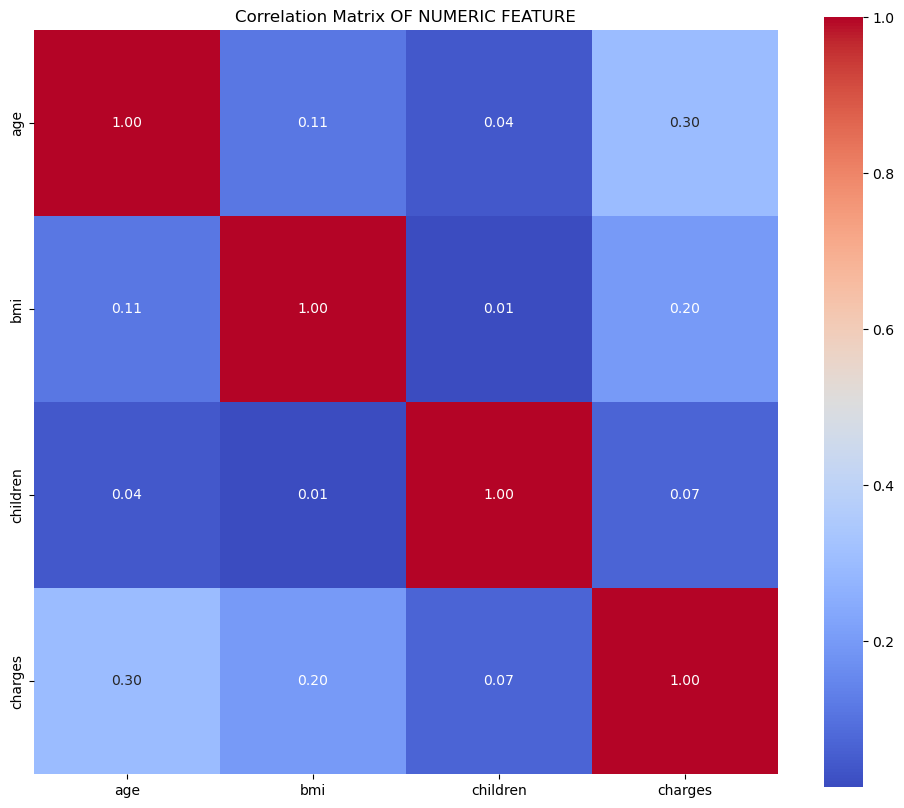

In [40]:
numeric_data = df[numerical_columns]
#compute pairwise correlation of numeric column
correlation_matrix = numeric_data.corr()

#Plotting correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f",square=True)
plt.title('Correlation Matrix OF NUMERIC FEATURE')
plt.show()

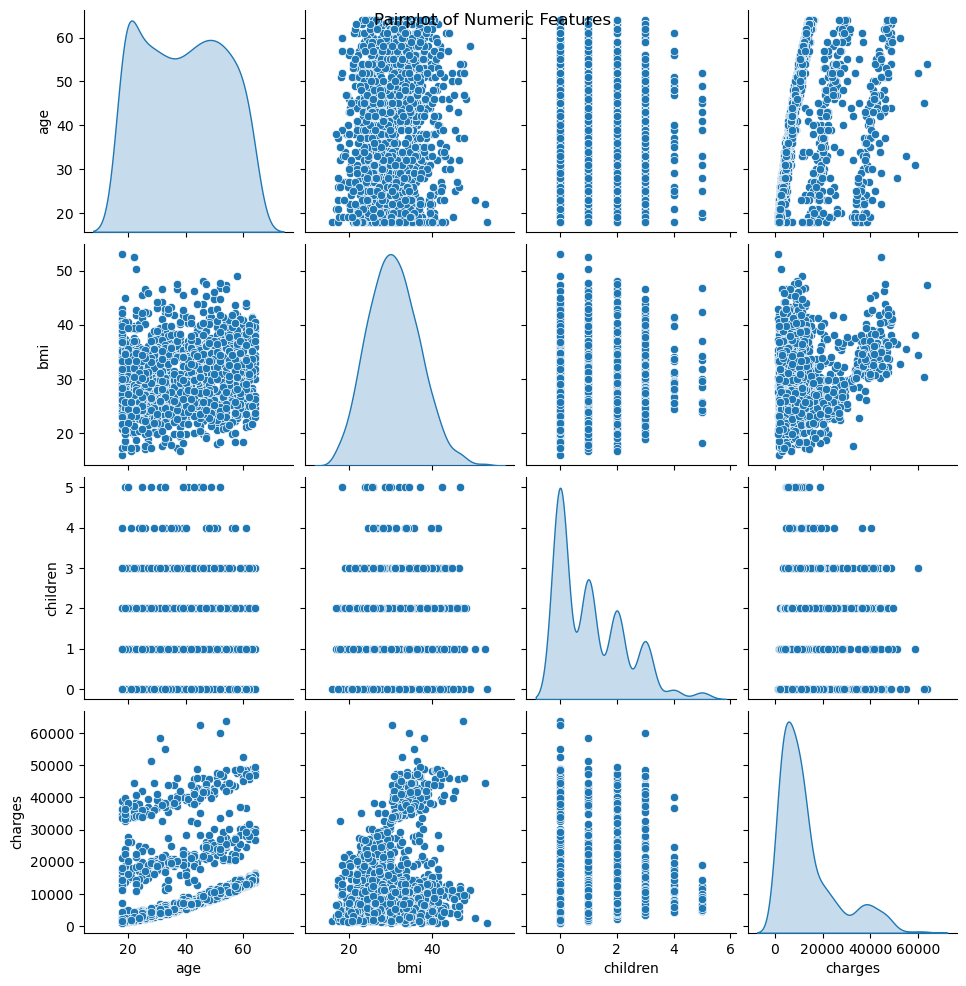

In [41]:
#Pairplot of numeric features
sns.pairplot(df[numerical_columns], diag_kind='kde')
plt.suptitle('Pairplot of Numeric Features')
plt.show()

In [42]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
print(list(df.columns))

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [44]:
df.to_csv('Data_Sets/filtered_data.csv',index=False)

In [45]:
#Display the first few rows and all columns
pd.set_option('display.max_columns',None)
print('First few rows od data:')
data=pd.read_csv('Data_Sets/filtered_data.csv')
print(data.head())

First few rows od data:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [46]:
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

In [47]:
X = data.drop('charges', axis=1)
y = data['charges']

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import os
import joblib #For saving the model

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 33596915.85136149


In [54]:
joblib.dump(model, 'medical_cost_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   bool   
 5   smoker_yes        1338 non-null   bool   
 6   region_northwest  1338 non-null   bool   
 7   region_southeast  1338 non-null   bool   
 8   region_southwest  1338 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 48.5 KB


In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [57]:
features = ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
X = data[features]
y = data['charges']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# Initialize and fit the scaler on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [108]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [110]:
joblib.dump(knn, 'knn_model.pkl')
joblib.dump(scaler, 'scaler2.pkl')

['scaler2.pkl']